# Load and plot SPX and DJX data

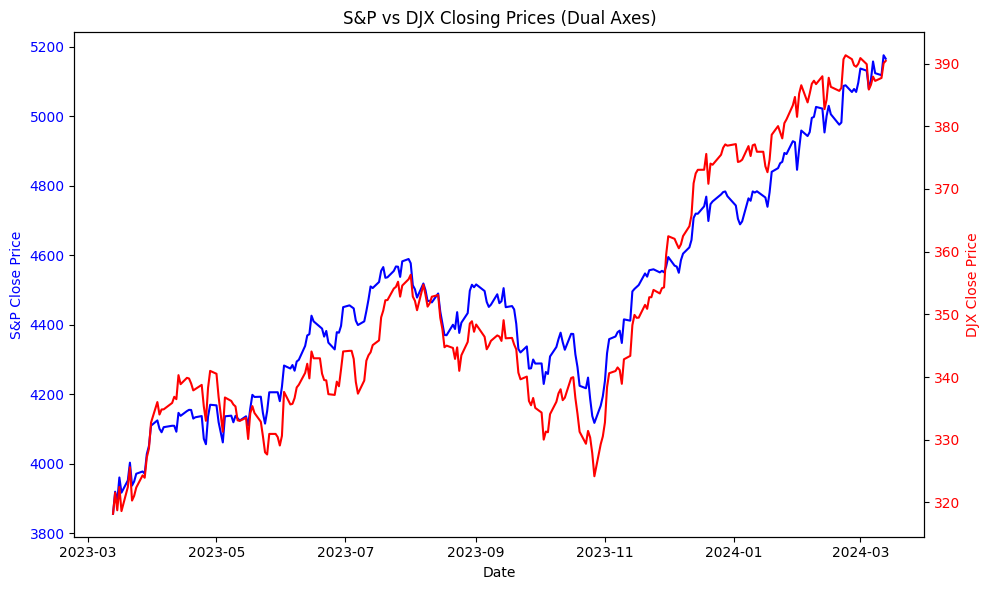

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
spx_df = pd.read_csv('INDEX_US_S&P US_SPX.csv')
djx_df = pd.read_csv('INDEX_XX_XCBO_DJX.csv')

# Convert the Date columns from string to datetime
spx_df['Date'] = pd.to_datetime(spx_df['Date'])
djx_df['Date'] = pd.to_datetime(djx_df['Date'])

# If necessary, adjust the Close column to remove commas and convert to float
spx_df['Close'] = spx_df['Close'].str.replace(',', '').astype(float)
djx_df['Close'] = djx_df['Close'].astype(float)  # Assuming DJX Close column doesn't have commas

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting S&P Index on the primary y-axis
ax1.plot(spx_df['Date'], spx_df['Close'], color='blue', label='S&P Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for the DJX Index
ax2 = ax1.twinx()  
ax2.plot(djx_df['Date'], djx_df['Close'], color='red', label='DJX Index')
ax2.set_ylabel('DJX Close Price', color='red') 
ax2.tick_params(axis='y', labelcolor='red')

# Adding a title and adjusting the layout
plt.title('S&P vs DJX Closing Prices (Dual Axes)')
fig.tight_layout()  # To make sure everything fits without overlapping

plt.show()
